#Intro

This is the third practical homework for the ML seminar. It contains two parts:

  1. Training a decision tree and a kNN on the MNIST dataset from the previous homeworks and commenting on the overfitting or underfitting problems if necessary.

  2. Visualizing the decision boundaries in 2 dimensions using a new dataset and the classification algorithms we have learnt so far.

# Part 1


##1.

Obtain the data from the previous homework.

In [ ]:
# Data is at: https://drive.google.com/file/d/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0" -O mnist_Xy.zip && rm -rf /tmp/cookies.txt

!unzip mnist_Xy.zip

import numpy as np
X = np.load("mnist_X.npy")
y = np.load("mnist_y.npy")

--2020-11-17 21:04:34--  https://docs.google.com/uc?export=download&confirm=&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0
Resolving docs.google.com (docs.google.com)... 142.250.125.138, 142.250.125.100, 142.250.125.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-84-docs.googleusercontent.com/docs/securesc/af009bskf4hfc9u11du00g9n32eki8vu/lqputqekollg246gkujae9doe0gp0kat/1605647025000/03293566965117062760/09872145779612599088Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download [following]
--2020-11-17 21:04:35--  https://doc-0o-84-docs.googleusercontent.com/docs/securesc/af009bskf4hfc9u11du00g9n32eki8vu/lqputqekollg246gkujae9doe0gp0kat/1605647025000/03293566965117062760/09872145779612599088Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download
Resolving doc-0o-84-docs.googleusercontent.com (doc-0o-84-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connectin

##2. 

### a. 

Split the dataset in (train, validation, test) using the following percentages: 60%, 20%, 20%, as you already did in the previous homework.

In [ ]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

### b. 
Preprocess the obtained datasets as we did in the previous hoemwork.

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

## 3.


### a. 
Train a decision tree on the train set.

In [ ]:
import sklearn.tree
%time dt = sklearn.tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

###  b. 
Compute the training and validation accuracy.


In [ ]:
import sklearn.metrics

acc_train_dtig = dt.score(X_train, y_train)
acc_val_dtig = dt.score(X_val, y_val)

print("Training accuracy: " + str(acc_train_dtig))
print("Validation accuracy: " + str(acc_val_dtig))

Training accuracy: 1.0
Validation accuracy: 0.869


###  c. 
Do you encounter overfitting or underfitting? If yes, fix somehow the problem. If no, imagine that you had overfitting/underfitting and explain in words how you would fix this.


There is overfitting (100% accuracy on the training set)

In [ ]:
%time dt = sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(X_train, y_train)

acc_train_dtig = dt.score(X_train, y_train)
acc_val_dtig = dt.score(X_val, y_val)

print("Training accuracy: " + str(acc_train_dtig))
print("Validation accuracy: " + str(acc_val_dtig))

CPU times: user 5.78 s, sys: 3.99 ms, total: 5.78 s
Wall time: 5.79 s
Training accuracy: 0.7009761904761905
Validation accuracy: 0.6879285714285714


## 4. 

### a. 
Train a kNN with k=1 (i.e. a 1NN) on the train set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

%time knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

CPU times: user 20.5 s, sys: 177 ms, total: 20.7 s
Wall time: 20.6 s


###  b. 
Compute ONLY the validation accuracy (because it already takes a lost of time, i.e. almost 20 minutes). Knowing that the dataset is consistent, what is the training accuracy (without running any code)?

In [ ]:
%time acc_val_knn = dt.score(X_val, y_val)

print("Validation accuracy: " + str(acc_val_knn))

CPU times: user 30 ms, sys: 19 ms, total: 48.9 ms
Wall time: 51 ms
Validation accuracy: 0.6879285714285714


The training accuracy will be 100% since the dataset is consistent and the 1 nearest neighbour of an instance will be the instance itself.

###c.
Why does it take such a long time for kNN to predict labels of new instances?

That is because the model is created each time it has to test an instance, no processing is done before that (aside from storing the dataset in memory), thus it is a lazy algorithm (unlike ID3, NB, JB which are eager algorithms).

###  d. 
Do you encounter overfitting or underfitting? 

Overfitting since the training accuracy will always be 100% in this case.

###  e. 
Imagine that you have overfitting/underfitting (and enough time to wait) and explain in words how you will fix this.


Try out a different value for k

# Part 2: Decision Boundaries in 2D

Source: The following were taken from [here](https://www.coursera.org/learn/neural-networks-deep-learning/notebook/NI888/planar-data-classification-with-a-hidden-layer)

## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- planar_utils provide various useful functions used in this assignment

In [ ]:
!wget https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils_modified import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

--2020-11-17 21:31:26--  https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2106 (2.1K) [text/plain]
Saving to: ‘planar_utils_modified.py’

planar_utils_modifi 100%[===================>]   2.06K  --.-KB/s    in 0s      

2020-11-17 21:31:26 (38.0 MB/s) - ‘planar_utils_modified.py’ saved [2106/2106]



## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `y`.

In [ ]:
X, y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

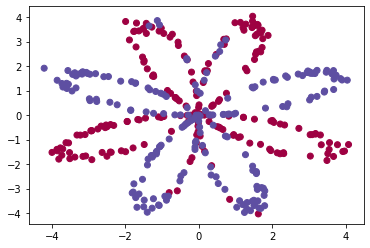

In [ ]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

You have:
- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = np.shape(X)
shape_y = np.shape(y)
m = len(y)
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of y is: ' + str(shape_y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (400, 2)
The shape of y is: (400,)
I have m = 400 training examples!


**Expected result**:

<table>

  <tr>
    <td><b>shape of X</b></td>
    <td> (400,2) </td> 
  </tr>
  
  <tr>
    <td><b>shape of y</b></td>
    <td>(400,) </td> 
  </tr>
  
  <tr>
    <td><b>m</b></td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Simple Logistic Regression

Let's first see how logistic regression (a classification method that we did not discuss) performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [ ]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

You can now plot the decision boundary of the model. Run the code below.

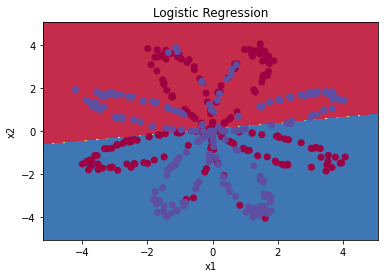

In [ ]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")
plt.show()

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well.


<b>Exercise</b>: Using models from sklearn, plot the decision boundaries for the following:

- a decision tree
  - what type of decision boundary you see

- Gaussian Naive Bayes
  - what type of decision boundary you see

- kNN: 1NN, 11NN, 51NN, 201NN;
    - what type of decision boundary you see 
    - specify if the decision boundary becomes smoother or not as k increases
    - specify if the time at inference increases or not as k increases

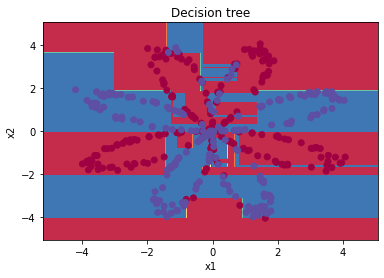

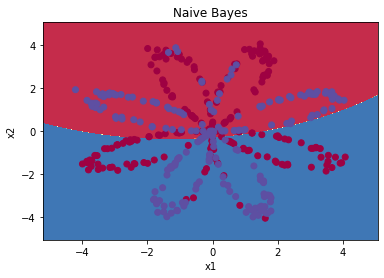

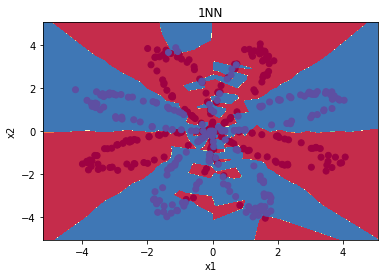

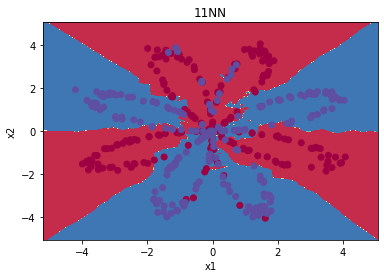

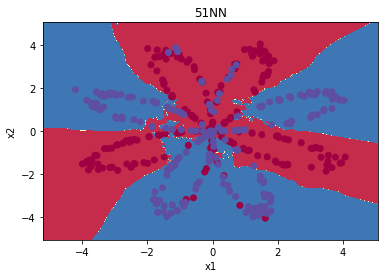

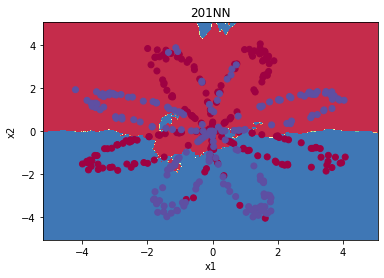

In [ ]:
import sklearn.naive_bayes

dt = sklearn.tree.DecisionTreeClassifier(criterion="entropy").fit(X, y)
plot_decision_boundary(lambda x: dt.predict(x), X, y)
plt.title("Decision tree")
plt.show()

gnb = sklearn.naive_bayes.GaussianNB().fit(X, y)
plot_decision_boundary(lambda x: gnb.predict(x), X, y)
plt.title("Naive Bayes")
plt.show()

knn1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)
plot_decision_boundary(lambda x: knn1.predict(x), X, y)
plt.title("1NN")
plt.show()
knn11 = KNeighborsClassifier(n_neighbors=11).fit(X, y)
plot_decision_boundary(lambda x: knn11.predict(x), X, y)
plt.title("11NN")
plt.show()
knn51 = KNeighborsClassifier(n_neighbors=51).fit(X, y)
plot_decision_boundary(lambda x: knn51.predict(x), X, y)
plt.title("51NN")
plt.show()
knn201 = KNeighborsClassifier(n_neighbors=201).fit(X, y)
plot_decision_boundary(lambda x: knn201.predict(x), X, y)
plt.title("201NN")
plt.show()

a decision tree
-very noisy decision boundary but quite accurate

Gaussian Naive Bayes
-smooth decison boundary but misclassifies many instances

kNN: 1NN, 11NN, 51NN, 201NN;
-better decision boundaries with lower values for k
-the decision boundary becomes visibly smoother as k increases
-the time increases (linearly?) as k increases